## One parameter Bayesian optimisation: The lighthouse problem

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 18})
from scipy.stats import cauchy

The lighthouse is at a position $\alpha = 1$ along the coastline, which we want to estimate, and at a known distance from the coastline of $\beta =5$ (in Sivia $\beta=1$ but this gives a very narrow pdf which leads to too many samples near $\alpha_0$. The probability that the k-th flash will be recorded at position $x_k$, knowing the coordinate of the lighthouse $(\alpha, \beta)$ is given by the Cauchy distribution:
\begin{equation}
p(x \mid \alpha_0, \, \beta) = \frac{1}{\pi \beta \left[1+\left(\frac{x-\alpha_0}{\beta}\right)^2\right]}
\end{equation}

The plots below show the probability $p(x \mid \alpha_0, \, \beta)$, where the vertical line is centred at $\alpha_0$, and the histogram of 500 points drawn from this distribution.

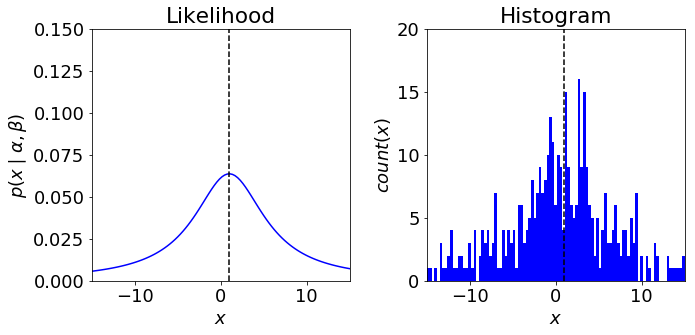

In [2]:
alpha_0 = 1
beta = 5
n = 500
np.random.seed(seed=12)
rv = cauchy(loc=alpha_0, scale=beta)
x = rv.rvs(size=n)

fig = plt.figure(figsize=(10,5))
xmin = -15; xmax = 15
x_plot = np.linspace(xmin, xmax, 100)
ax1 = fig.add_subplot(121)
ax1.plot(x_plot,rv.pdf(x_plot), 'b-')
ax1.plot([alpha_0, alpha_0], [0, 1], '--k')
ax1.set_xlim(-15,15)
ax1.set_ylim(0,0.15)
ax1.set_xlabel('$x$')
ax1.set_ylabel(r'$p(x \mid \alpha, \beta)$')
ax1.set_title('Likelihood')
ax2 = fig.add_subplot(122)
bins = np.linspace(xmin, xmax, 100)
ax2.hist(x,bins, color='blue')
ax2.plot([alpha_0, alpha_0], [0, 100], '--k')
ax2.set_ylim(0, 20)
ax2.set_xlim(-15,15)
ax2.set_xlabel('$x$')
ax2.set_ylabel('$count(x)$')
ax2.set_title('Histogram')
fig.tight_layout()
plt.show()


We assume a uniform prior for the position $\alpha$ of the lighthouse over the length of the coastline $(\alpha_{min}, \alpha_{max})$:
\begin{equation}
p(\alpha) = \frac{1}{\alpha_{max}-\alpha_{min}}
\end{equation}

Given $n'$ observations of the data set $X=\left[x_k\right]_{k=1}^N$, the logarithm of the posterior probability of the parameter $\alpha$ is given by Eq. 2.38
\begin{equation}
L = \log\left(p(\alpha \mid X', \beta \right) = constant - \sum_{k=1}^{n'} \log\left( \beta + (x_k-\alpha)^2 \right)
\end{equation}

The best estimate of the position of the lighthouse $\alpha_0$ is given by the maximum of the posterior pdf.

The plots below show the posterior pdf at different number of observations $x_k$, whose position is indicated by the circles at the top of the plot. The vertical dashed line indicate the true position of the lighthouse $\alpha_0$, while the solid line the average of $X' = \left[x_k\right]_{k=1}^{n_{obs}}$.

As the number of obervations increases the posterior pdf get sharper and its maximum move towards the the true value $\alpha_0=1$. Since the likelihood of the data is not Gaussian the average of the position is not equal to the maximum of the posterior, as explained at page 36 of Sivia. 

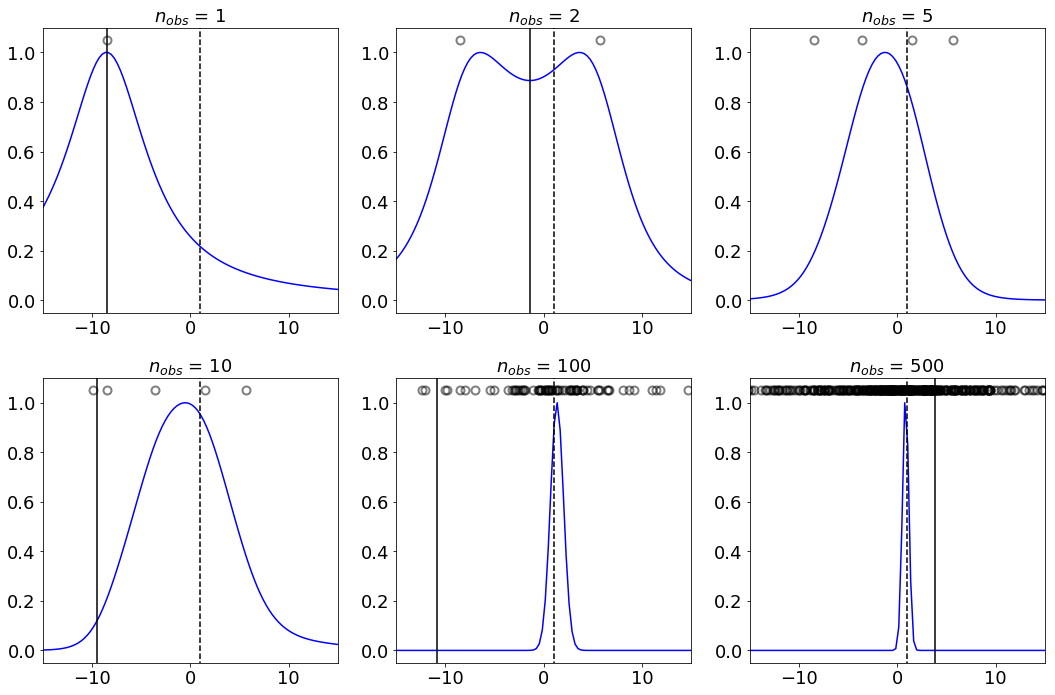

In [3]:
def posterior(x, alpha, beta):
    L = -np.sum(np.log(beta**2+(x[:,None] - alpha[None,:])**2), axis=0)
    L = L-L.max() # subract maximum to avoid out of range when doing the exponential
    posterior = np.exp(L)
    return posterior

alpha = np.linspace(xmin, xmax, 100)
N_obs = [1, 2, 5, 10, 100, 500]

fig, axs = plt.subplots(2,3, figsize=(15, 10))
# fig.subplots_adjust(hspace = .5, wspace=.001)

axs = axs.ravel()

for i in range(6):
    n_obs = N_obs[i]
    x_obs = x[:n_obs]
    axs[i].plot(alpha, posterior(x_obs, alpha, beta), 'b')
    axs[i].plot(x_obs, 1.05*np.ones(x_obs.shape), 'ko', linewidth=2, ms=8, mew=2, mfc='None', alpha=0.5 )
    axs[i].plot([alpha_0, alpha_0], [-0.1, 1.1], 'k--')
    axs[i].plot([x_obs.mean(), x_obs.mean()], [-0.1, 1.1], 'k-')
    axs[i].set_xlim(-15, 15)
    axs[i].set_ylim(-0.05, 1.1)
    axs[i].set_title('$n_{obs}$ = %d' %n_obs, fontsize=18)

fig.tight_layout()
plt.show()

In [10]:
beta = np.linspace(0, 10, 100)
Alpha, Beta = np.meshgrid(alpha,beta)

def posterior_2D(x, Alpha, Beta):
    L = np.zeros(Alpha.shape)
    for i in range(len(x)):
        l_i = -np.log(Beta**2+(x[i] - Alpha)**2)
        L = L+l_i
    L = L-L.max() # subract maximum to avoid out of range when doing the exponential
    posterior = np.exp(L)
    return posterior

p = posterior_2D(x[:100], Alpha, Beta)